# AutoEncode 노이즈 제거
---
- 데이터의 노이즈 제거에 활용됨
- 데이터에서 주요 특징만 추출/압축하기 때문에, 노이즈는 주요 특징에서 제거된다
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거됨

In [78]:
from keras.datasets.mnist import load_data
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import set_random_seed, plot_model
from keras.models import save_model, load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
set_random_seed(42)

# [1] 데이터 준비 및 로딩

In [79]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [80]:
x_train = x_train / 255.0
x_test = x_test / 255.5

In [81]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# [2] 데이터 전처리

In [82]:
# 데이터 셋에 노이즈 추가
x_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
x_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# 최소값, 최대값 범위지정(픽셀 범위 0.0 ~ 1.0 벗어나는 픽셀값 조정)
x_train_noised = np.clip(x_train_noised, a_min=0, a_max=1)
x_test_noised = np.clip(x_test_noised, a_min=0, a_max=1)

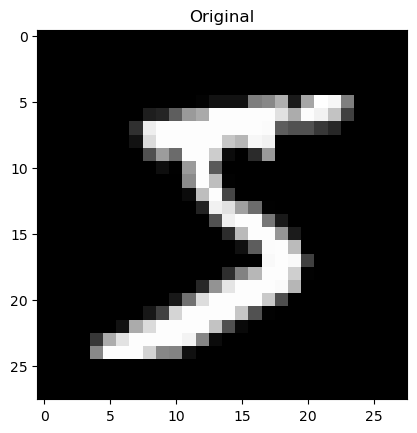

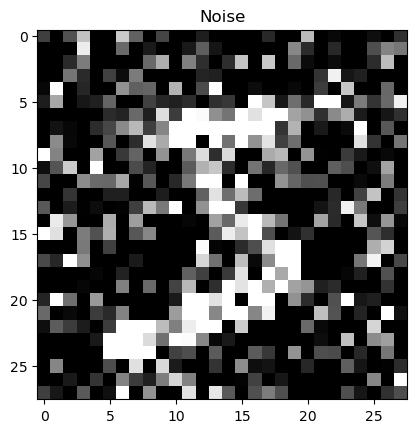

In [83]:
# 원본이미지 <=> 노이즈 추가 이미지 비교
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.show()

plt.imshow(x_train_noised[0].reshape(28, 28), cmap='gray')
plt.title('Noise')
plt.show()

In [84]:
def model_create(model_name, layer_in):
    model_name = Sequential(name=model_name)
    model_name.add(Dense(layer_in, activation='relu', input_shape=(784,)))
    model_name.add(Dense(784, activation='sigmoid'))
    model_name.compile(loss='mean_squared_error',
                       metrics='accuracy',
                       optimizer='adam')
    return model_name

In [85]:
model_4 = model_create('model_3', 500)

In [86]:
# model_4.fit(x_train_noised, x_train, epochs=10)

In [87]:
# pre_out = model_4.predict(x_train_noised[0].reshape(-1, 784))

In [88]:
# plt.imshow(x_train_noised[0].reshape(28, 28), cmap='gray')
# plt.title('Noise')
# plt.show()
#
# plt.imshow(pre_out.reshape(28, 28), cmap='gray')
# plt.title('Encoded')
# plt.show()

# CNN을 사용하여 노이즈 제거

In [207]:
def cnn_model_create(model_name, layer_input):
    model = Sequential()
    model.add(Conv2D(layer_input,
                     kernel_size=3,
                     strides=(1, 1),
                     padding='same',
                     activation='relu',
                     input_shape=(28, 28, 1)))
    # model.add(MaxPool2D())
    # model.add(Flatten())
    model.add(Conv2D(1,
                     kernel_size=3,
                     strides=(1, 1),
                     padding='same',
                     activation='relu'))
    model.compile(loss='binary_crossentropy',
                  metrics='accuracy',
                  optimizer='adam')
    return model

In [208]:
model_cnn = cnn_model_create('model_cnn', 10)
x_train_noised = x_train_noised.reshape(-1, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)

In [209]:
model_cnn.fit(x_train_noised, x_train, epochs=1)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.1469 - accuracy: 0.8123


In [210]:
pre_out = model_cnn.predict(x_train_noised[0].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 38ms/step


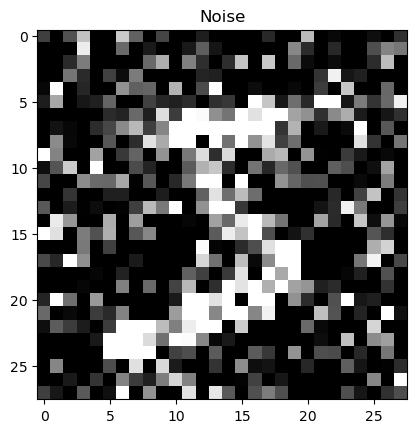

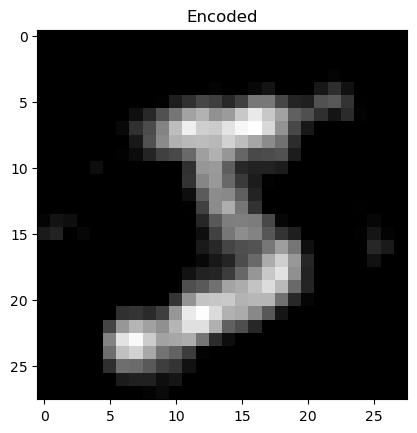

In [211]:
plt.imshow(x_train_noised[0], cmap='gray')
plt.title('Noise')
plt.show()

plt.imshow(pre_out.reshape(28, 28), cmap='gray')
plt.title('Encoded')
plt.show()